# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector, RFE

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The purpose of this task is to use machine learning techniques to evaluate the data and learn about the trends and customer behavior.  For this particular case, it is important to analyze the factors that drive the price of cars and use such information to give useful recommendations to the client. In other words, we need to understand the behavior and the trends of the data in order to properly give meaningful feedback to the client. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The first step is to import the data and have a clear notion of what it contains. 

In [2]:
df=pd.read_csv("C:/Users/diego/Downloads/practical_application_II_starter/data/vehicles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

Then, it is important to see if there are any null values in the data that can cause future problems in the analysis portion. 

In [3]:
df.isnull().sum().sort_values()

id                   0
price                0
state                0
region               0
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
drive           130567
VIN             161042
condition       174104
cylinders       177678
size            306361
dtype: int64

In [4]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

First, it is fundamental to get rid of the null values found in the data. In order to do this, I first dropped all the null values for the year and odometer columns, since they are already integers and are very important for predicting the price. 

In [5]:
df.dropna(subset = ['year', 'odometer'], inplace=True)
df.isnull().sum().sort_values()

id                   0
odometer             0
year                 0
state                0
region               0
price                0
transmission      1695
fuel              2172
model             5195
title_status      7358
manufacturer     16267
type             91782
paint_color     128090
drive           128849
VIN             159323
condition       170493
cylinders       174759
size            301612
dtype: int64

Then, I dropped the columns that will not be used for the analysis and prediction of the data. In this case, I decided to drop the id, VIN and drive columns. 

In [6]:
df=df.drop(columns=['id', 'VIN', 'drive'])
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,NaN,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,NaN,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,NaN,sedan,silver,wy


For the rest of the columns, I filled all the null values with "other" or "not specified", as shown below. 

In [7]:
df['type'].fillna("other", inplace=True)
df['manufacturer'].fillna("other", inplace=True)
df['model'].fillna("other", inplace=True)
df['paint_color'].fillna("other", inplace=True)
df['condition'].fillna("not specified", inplace=True)
df['cylinders'].fillna("not specified", inplace=True)
df['fuel'].fillna("not specified", inplace=True)
df['title_status'].fillna("not specified", inplace=True)
df['transmission'].fillna("not specified", inplace=True)
df['size'].fillna("not specified", inplace=True)
df.isnull().sum().sort_values()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
size            0
type            0
paint_color     0
state           0
dtype: int64

Also, I decided to evaluate the data provided throughout the years. Most of the data is clustered between 1990 and 2023. As such, I dropped all the existing data before 1990. 

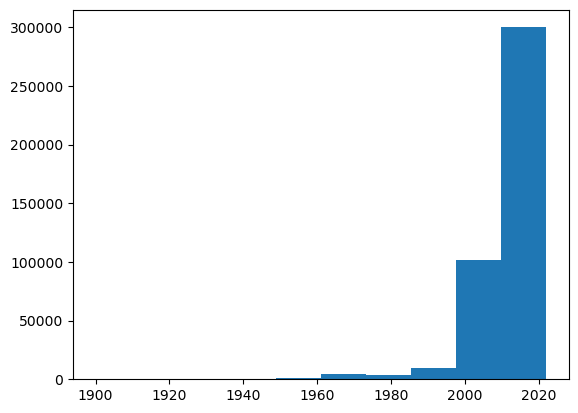

In [8]:
plt.hist(df['year'])
plt.show()

In [9]:
data = df[(df["year"] >= 1990)]
data

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,not specified,pickup,white,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,not specified,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,not specified,pickup,red,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,not specified,pickup,red,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,not specified,sedan,other,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,not specified,gas,12029.0,clean,other,not specified,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,not specified,diesel,4174.0,clean,other,not specified,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,not specified,sedan,silver,wy


Lastly, I generated numerical values for all the data in the columns. For each unique value in the column, there is a numerical group that represents it. 

In [11]:
from warnings import filterwarnings 
filterwarnings('ignore')

regions = data['region'].unique()
region2 = {region: i for i, region in enumerate(regions)}

data['region'] = data['region'].map(region2)

states = data['state'].unique()
state2 = {state: i for i, state in enumerate(states)}

data['state'] = data['state'].map(state2)

manu = data['manufacturer'].unique()
manu2 = {mnu: i for i, mnu in enumerate(manu)}
data['manufacturer'] = data['manufacturer'].map(manu2)

model = data['model'].unique()
model2 = {mod: i for i, mod in enumerate(model)}

data['model'] = data['model'].map(model2)

condition = data['condition'].unique()
condition2 = {con: i for i, con in enumerate(condition)}

data['condition'] = data['condition'].map(condition2)

cylinders = data['cylinders'].unique()
cylinders2 = {cy: i for i, cy in enumerate(cylinders)}
data['cylinders'] = data['cylinders'].map(cylinders2)

fuel = data['fuel'].unique()
fuel2 = {fu: i for i, fu in enumerate(fuel)}

data['fuel'] = data['fuel'].map(fuel2)

title_status = data['title_status'].unique()
title_status2 = {tit: i for i, tit in enumerate(title_status)}

data['title_status'] = data['title_status'].map(title_status2)

transmission = data['transmission'].unique()
transmission2 = {tr: i for i, tr in enumerate(transmission)}

data['transmission'] = data['transmission'].map(transmission2)

size = data['size'].unique()
size2 = {si: i for i, si in enumerate(size)}

data['size'] = data['size'].map(size2)

typ = data['type'].unique()
type2 = {typee: i for i, typee in enumerate(typ)}

data['type'] = data['type'].map(type2)

paint = data['paint_color'].unique()
paint2 = {pai: i for i, pai in enumerate(paint)}

data['paint_color'] = data['paint_color'].map(paint2)

data




,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color,state
27,0,33590,2014.0,0,0,0,0,0,57923.0,0,0,0,0,0,0
28,0,22590,2010.0,1,1,0,0,0,71229.0,0,0,0,0,1,0
29,0,39590,2020.0,1,2,0,0,0,19160.0,0,0,0,0,2,0
30,0,30990,2017.0,2,3,0,0,0,41124.0,0,0,0,0,2,0
31,0,15000,2013.0,3,4,1,1,0,128000.0,0,1,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,403,23590,2019.0,5,946,0,1,0,32226.0,0,0,0,7,6,50
426876,403,30590,2020.0,15,55,0,2,0,12029.0,0,0,0,7,2,50
426877,403,34990,2020.0,8,27,0,2,2,4174.0,0,0,0,5,0,50
426878,403,28990,2018.0,11,1105,0,1,0,30112.0,0,0,0,7,4,50


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408999 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        408999 non-null  int64  
 1   price         408999 non-null  int64  
 2   year          408999 non-null  float64
 3   manufacturer  408999 non-null  int64  
 4   model         408999 non-null  int64  
 5   condition     408999 non-null  int64  
 6   cylinders     408999 non-null  int64  
 7   fuel          408999 non-null  int64  
 8   odometer      408999 non-null  float64
 9   title_status  408999 non-null  int64  
 10  transmission  408999 non-null  int64  
 11  size          408999 non-null  int64  
 12  type          408999 non-null  int64  
 13  paint_color   408999 non-null  int64  
 14  state         408999 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 49.9 MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

First, I decided to create a correlation matrix with all the columns in the data. As shown, there is a strong correlation between the region and the state, which is expected. 

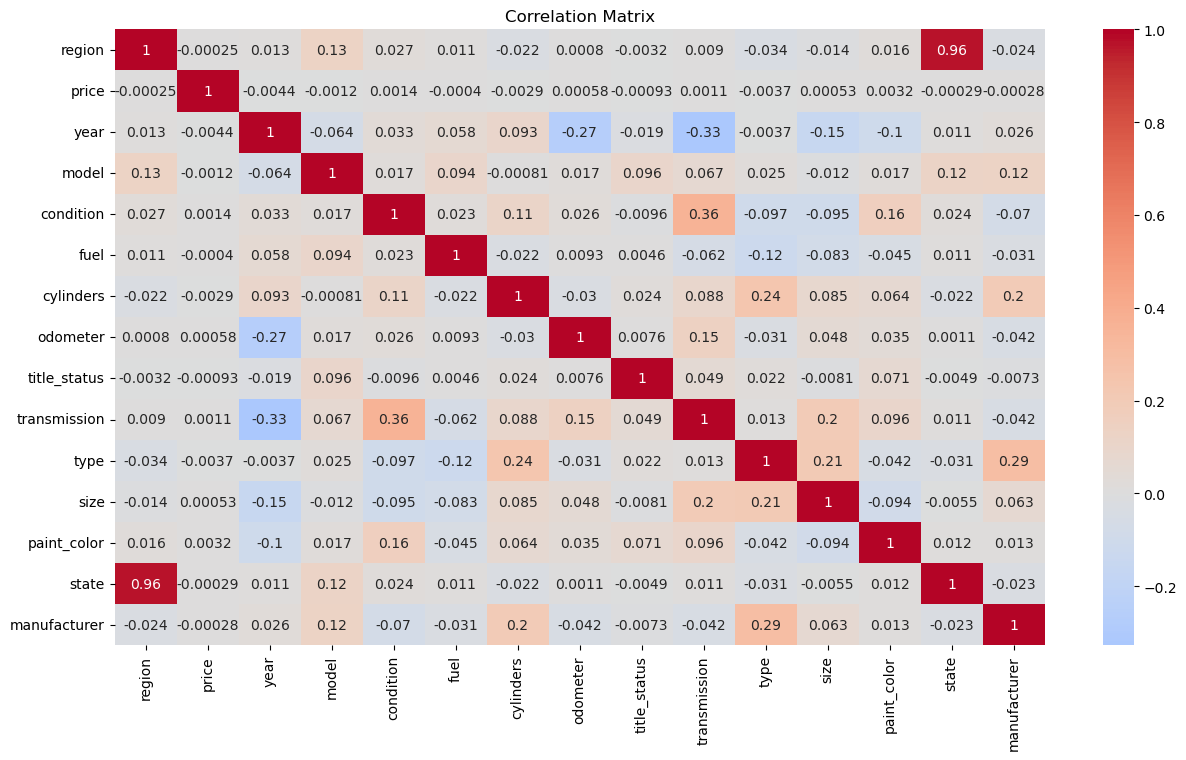

In [13]:
matrix = data[['region', 'price', 'year', 'model', 'condition', 'fuel', 'cylinders', 'odometer',
                       'title_status', 'transmission', 'type', 'size', 'paint_color', 'state','manufacturer']]
cor = matrix.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

For the model, I decided to create a linear regression model to train and test the data. I calculated the MSE and the residuals, as shown below.

In [14]:
X = data.drop('price', axis = 1)
y = np.log1p(data['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#LinearRegression
lin=LinearRegression()
lin.fit(X_train, y_train)
pred = lin.predict(X_test)
mse = mean_squared_error(y_test,pred)
print("LinearRegression MSE:", mse)

LinearRegression MSE: 7.026378099108668


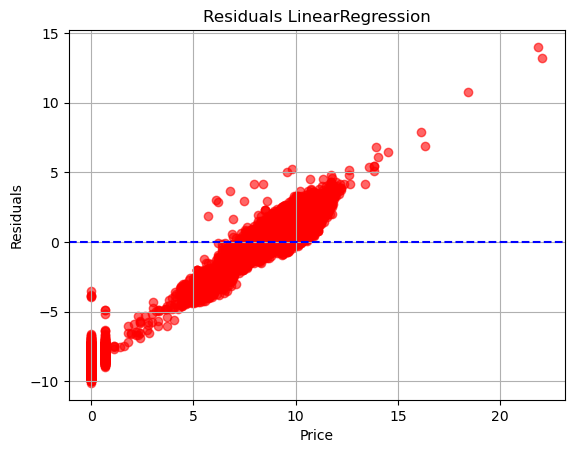

In [16]:
#LinearRegression residuals
residuals = y_test - pred
plt.scatter(y_test,residuals, color='red', alpha=0.6)
plt.axhline(y=0, color='blue', linestyle='--')
plt.title("Residuals LinearRegression")
plt.xlabel("Price")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

For the evaluation portion, I decided to evaluate different cross validation techniques. First I used Sequential feature selection with Lasso, then I used RFE and lastly I evaluated using the ridge selector. 

In [17]:
pip = Pipeline ([('scale', StandardScaler()),('selector', SequentialFeatureSelector(estimator= Lasso(), n_features_to_select = 4)),('lassoreg', LinearRegression())])
pip.fit(X_train,y_train)
testprediction = pip.predict(X_test)
trainprediction = pip.predict(X_train) 
trainmse = mean_squared_error(y_train, trainprediction)
testmse = mean_squared_error(y_test, testprediction)
coef = pip.named_steps['lassoreg'].coef_
featurenames = pip.named_steps['selector'].get_feature_names_out() 
print(f'Train MSE: {trainmse}')
print(f'Test MSE: {testmse}')

Train MSE: 7.4707862390454975
Test MSE: 7.357039999047261


In [18]:
pipR = Pipeline ([('scale', StandardScaler()),('selector', RFE(estimator= Lasso(), n_features_to_select = 4)),('lassoreg', LinearRegression())])
pipR.fit(X_train,y_train)
trainpredictR = pipR.predict(X_train) 
testpredictR = pipR.predict(X_test)
trainmseR = mean_squared_error(y_train, trainpredictR)
testmseR = mean_squared_error(y_test, testpredictR)
coefR = pipR.named_steps['lassoreg'].coef_
featurenamesR = pipR.named_steps['selector'].get_feature_names_out() 
print(f'Train MSE: {trainmseR}')
print(f'Test MSE: {testmseR}')

Train MSE: 7.436438660682446
Test MSE: 7.329054601838867


In [19]:
pipe_ridge = Pipeline([
    ('scalar', StandardScaler()), 
    ('ridge', Ridge())
])
param_dict = {'ridge__alpha': [0.0001, 0.001, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]}
grid_search = GridSearchCV(pipe_ridge, param_grid=param_dict)
grid_search.fit(X_train, y_train)
model_train_mse = mean_squared_error(y_train, grid_search.predict(X_train))
model_test_mse = mean_squared_error(y_test, grid_search.predict(X_test))
model_best_alpha = grid_search.best_params_
print(f'Train MSE: {model_train_mse}')
print(f'Test MSE: {model_test_mse}')
print(f'Best Alpha: {list(model_best_alpha.values())[0]}')

Train MSE: 7.1287721697797855
Test MSE: 7.026379231413097
Best Alpha: 100.0


From the MSE obtained, it is clear that the best cross validation is the ridge selector, using alpha equal to 100. With this, I predicted and generated a permutation importance table, as shown below. 

In [20]:
pipe2 = Pipeline([('scale', StandardScaler()), ('ridge', Ridge(alpha = 100))])
pipe2.fit(X_train,y_train)

train = pipe2.predict(X_train)
test = pipe2.predict(X_test)
train_mse = mean_squared_error(y_train,train)
test_mse = mean_squared_error(y_test, test)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

coef= pipe2.named_steps['ridge'].coef_
names = X_train.columns
pd.DataFrame([coef.T], columns = names).T

Train MSE: 7.1287721697797855
Test MSE: 7.026379231413097


,0
region,0.259317
year,0.163920
manufacturer,-0.012937
model,0.006079
condition,-0.424526
cylinders,-0.094279
fuel,0.081726
odometer,-0.080925
title_status,0.021957
transmission,-0.130342


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

For the evaluation of the data, I used a linear regression model that gave a fairly acceptable MSE of 7.026378099108668. This means that the model will predict the price of the car in an accurate way. Moreover, the cross validation techniques used also arrived to good MSE values, to prevent overfitting. 

From the results, there are a few things that can be concluded. First, the region and year seem to be the most important factors when it comes to predicting the price of the car. In addition, the condition and the type of the car seem to have a high correlation. As such, since the region is sensitive to the price, it can be recommended to analyze which regions have the highest prices and which have a higher tendency of purchasing it. This is, looking for potential business opportunities and growth.

Also, given how the price of the cars increases over the years, it is important for the company to have this increasing trend in mind when making decisions. 